In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('data/cars.csv')
df.columns = ['speed', 'dist']
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


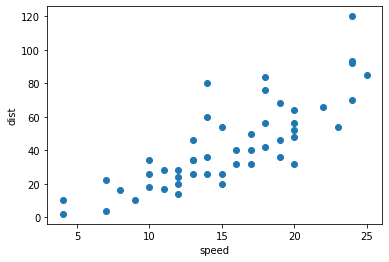

In [8]:
plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'], df['dist'])
plt.show()

In [10]:
x = tf.placeholder( tf.float32 )
y = tf.constant(df['dist'], tf.float32)

In [11]:
w = tf.Variable( tf.random_uniform([1]))
b = tf.Variable( tf.random_uniform([1]))

In [12]:
hx = w*x + b
cost = tf.reduce_mean(tf.square(hx-y))

In [18]:
optimizer = tf.train.GradientDescentOptimizer(0.001) # argument로 learning mate를 투입
train = optimizer.minimize( cost )

In [19]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [20]:
for i in range(10000) :
    sess.run(train, {x:df['speed']} ) 
    if i%100==0:
        print(i, sess.run(cost, {x:df['speed']} ) )

0 519.00226
100 259.91327
200 258.58478
300 257.30997
400 256.0868
500 254.91309
600 253.78677
700 252.7061
800 251.6691
900 250.67406
1000 249.71928
1100 248.8031
1200 247.92398
1300 247.0805
1400 246.27106
1500 245.49434
1600 244.7491
1700 244.034
1800 243.34784
1900 242.68938
2000 242.05757
2100 241.45132
2200 240.86964
2300 240.31143
2400 239.77583
2500 239.26186
2600 238.7687
2700 238.29549
2800 237.84145
2900 237.40576
3000 236.98766
3100 236.5865
3200 236.2016
3300 235.83218
3400 235.47777
3500 235.1377
3600 234.81143
3700 234.49828
3800 234.19781
3900 233.90952
4000 233.63286
4100 233.36745
4200 233.11272
4300 232.86829
4400 232.63371
4500 232.40874
4600 232.19281
4700 231.98558
4800 231.78671
4900 231.59598
5000 231.41289
5100 231.23724
5200 231.06871
5300 230.907
5400 230.7518
5500 230.60281
5600 230.45995
5700 230.32289
5800 230.19131
5900 230.06508
6000 229.94391
6100 229.82768
6200 229.71611
6300 229.60912
6400 229.50642
6500 229.40793
6600 229.31335
6700 229.22264
6800 22

In [21]:
sess.run(w)

array([3.7980723], dtype=float32)

In [22]:
sess.run(b)

array([-15.272199], dtype=float32)

In [38]:
# 자동차 속도가 30과 50일 때 각각의 제동거리를 출력하시오.
sess.run(hx, {x:[30,50]})

array([ 98.66997, 174.63141], dtype=float32)

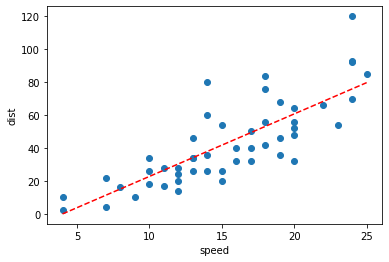

In [40]:
# 실측데이터는 scatter로
# 예측 데이터는 line그래프로 나타내기


plt.xlabel('speed')
plt.ylabel('dist')
plt.scatter(df['speed'], df['dist'])
plt.plot(df['speed'], sess.run(hx, {x:df['speed']}), 'r--')
plt.show()